<a href="https://colab.research.google.com/github/Wenypb/Simulacion/blob/main/Clase27-9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LIBRERIAS**

In [221]:
import numpy as np
import matplotlib.pyplot as plt

# **EJEMPLO DE LA CLASE CON UNA DISTRIBUCIÓN NORMAL**

**Función de densidad de probabilidad $ =\frac{1}{\sqrt{2\pi\sigma^{2}}}e^{\frac{-(x-\mu)^{2}}{2\sigma^{2}}}$**

In [222]:
# Función que calcula el valor de la densidad de probabilidad para cada valor de x con media (mu) y desviación estandar (sigma) dada.
def f(x,mu,sigma):
  return (1/np.sqrt(2*np.pi*sigma**2))*np.exp(-(x-mu)**2/(2*sigma**2))

**Establecemos los valores para la media y la desviación estandar (valores analíticos).**

In [223]:
# mu -> Media analítica
mu=0.2
# sigma -> Desviación estandar analítica
sigma=0.1

**Establecemos el valor de la amplitud de la propuesta de la cadena de Markov (delta).**

In [224]:
#delta -> Amplitud de la cadena de Markov
delta=0.5

**Algoritmo de Metropolis-Hastings para muestreo de la distribución de probabilidad normal**

In [225]:
# n -> Número de iteraciones del algoritmo de Metropolis-Hastings.
n=50000
# x -> array de ceros con tamaño 𝑛 donde todas las muestras inician en cero pero se almacenarán las muestras generadas en cada paso de la cadena de Markov.
x=np.zeros(n)
# x[0] -> Muestra inicial
x[0]=0
# acept -> Contador de aceptaciones
acept=0
# Ciclo donde en cada iteración se realiza una propuesta y se decide si se acepta o se rechaza.
for i in range(0,n-1):
  # y -> Propuesta
  y=x[i]+np.random.uniform(-delta,delta)
  # Ciclo donde se acepta o se rechaza la propuesta
    # np.random.rand()<min(1,f(y,mu,sigma)/f(x[i],mu,sigma)) -> Condición para aceptar la propuesta
  if np.random.rand()<min(1,f(y,mu,sigma)/f(x[i],mu,sigma)):
    # x[i+1]=y -> Al aceptarse la propuesta la nueva muestra 𝑥[𝑖+1] se establece como y
    x[i+1]=y
    # acept+=1 -> Al aceptarse la propuesta se incrementa el contador de aceptaciones en un 1
    acept+=1
  else:
    #x[i+1]=x[i] -> Si la propuesta no se acepta, la nueva muestra x[i+1] se establece como la muestra anterior 𝑥[𝑖]
    x[i+1]=x[i]
# Se imprime el porcentaje de aceptaciones
print("La aceptacion fue del",acept/n*100,"%")

La aceptacion fue del 31.612000000000002 %


**a) Gráfica de la distribución analítica**

**b) Histograma de la muestra generada**

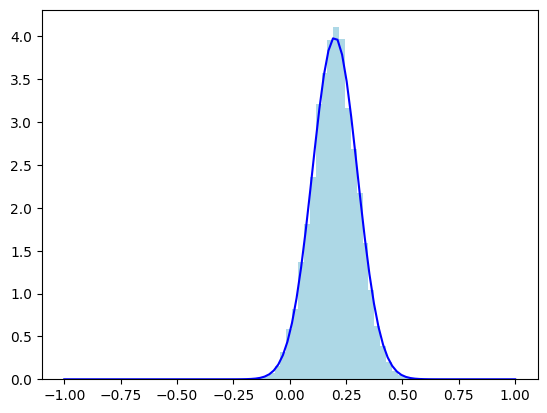

In [226]:
# Realiza el histograma de la muestra generada
plt.hist(x,density=True,color="lightblue",bins=30)
# Grafica la distribución analítica
xs=np.linspace(-1,1,100)
plt.plot(xs,f(xs,mu,sigma),color="blue")

**c) Determinación de la media y desviación estándar de la muestra y su comparación con la analítica.**

Calculamos la media y desviación estandar de la muestra

In [227]:
# m -> Media de la muestra
m=np.mean(x)
# d -> Desviación estandar de la muestra
d=np.std(x)
print("La media de la muestra es",m,"y la desviación estandar es",d)

La media de la muestra es 0.19858954768027837 y la desviación estandar es 0.09935411177365387


Realizamos la comparación

In [228]:
#Comparando las medias
  # Dif_medias -> Diferencia entre la media analítica(mu) y la media de la muestra(m)
Df_medias = abs(mu-m)
print("Comparando la media analítica con la muestral encontramos una diferencia de",Df_medias)

Comparando la media analítica con la muestral encontramos una diferencia de 0.0014104523197216445


In [229]:
#Comparando las desviaciones
  # Dif_desviaciones -> Diferencia entre la desviación estandar analítica(sigma) y la desviación estandar de la muestra(d)
Df_desviaciones = abs(sigma-d)
print("Comparando la desviación estandar analítica con la muestral encontramos una diferencia de",Df_desviaciones)

Comparando la desviación estandar analítica con la muestral encontramos una diferencia de 0.0006458882263461335


**d) Conclusiones**

 Dado una diferencia tan pequeña tanto en la comparación de las medias y las desviaciones estandar podemos concluir que la muestra representa bien a la distribución normal y que la media muestral es una buena estimación de la media analítica.

Gráfica de caminantes aleatorios

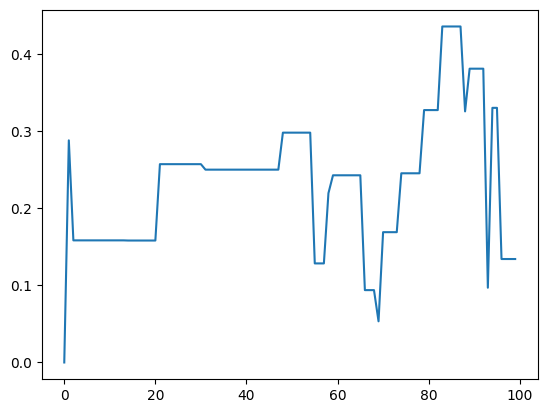

In [230]:
plt.plot(x[0:100])

# **DISTRIBUCIÓN 1**

## **Distribución exponencial**

La distribución exponencial es una distribución continua que se utiliza para modelar tiempos de espera para la ocurrencia de un cierto evento.

**Función de densidad de probabilidad $ = {\displaystyle \lambda e^{-\lambda x}}$ para $x\geq 0$**

In [231]:
# Función que calcula el valor de la densidad de probabilidad para cada valor de x con lamda dada.
def f(x, L):
    return L * np.exp(-L * x) * (x >= 0)  # Aseguramos que x >= 0

Establecer el valor de lambda $λ$

In [232]:
# L -> Valor de lambda
L = 1

**Calcular los valores de la media y la desviación estandar (valores analíticos).**

In [233]:
# mu -> Media analítica
mu= 1/L
print("La media analítica es",mu)
# sigma -> Desviación estandar analítica
sigma=np.sqrt(1/(L**2))
print("La desviación estandar analítica es",sigma)

La media analítica es 1.0
La desviación estandar analítica es 1.0


**Establecemos el valor de la amplitud de la propuesta de la cadena de Markov (delta).**

In [234]:
#delta -> Amplitud de la cadena de Markov
delta=0.5

**Algoritmo de Metropolis-Hastings para muestreo de la distribución de probabilidad exponencial**

In [235]:
# n -> Número de iteraciones del algoritmo de Metropolis-Hastings.
n=50000
# x -> array de ceros con tamaño 𝑛 donde todas las muestras inician en cero pero se almacenarán las muestras generadas en cada paso de la cadena de Markov.
x=np.zeros(n)
# x[0] -> Muestra inicial
x[0]=0
# acept -> Contador de aceptaciones
acept=0
# Ciclo donde en cada iteración se realiza una propuesta y se decide si se acepta o se rechaza.
for i in range(0,n-1):
  # y -> Propuesta
  y=x[i]+np.random.uniform(-delta,delta)
  # Ciclo donde se acepta o se rechaza la propuesta
    # np.random.rand()<min(1,f(y,mu,sigma)/f(x[i],mu,sigma)) -> Condición para aceptar la propuesta
  if np.random.rand()<min(1,f(y,L)/f(x[i],L)):
    # x[i+1]=y -> Al aceptarse la propuesta la nueva muestra 𝑥[𝑖+1] se establece como y
    x[i+1]=y
    # acept+=1 -> Al aceptarse la propuesta se incrementa el contador de aceptaciones en un 1
    acept+=1
  else:
    #x[i+1]=x[i] -> Si la propuesta no se acepta, la nueva muestra x[i+1] se establece como la muestra anterior 𝑥[𝑖]
    x[i+1]=x[i]
# Se imprime el porcentaje de aceptaciones
print("La aceptacion fue del",acept/n*100,"%")

La aceptacion fue del 79.398 %


**a) Gráfica de la distribución analítica**

**b) Histograma de la muestra generada**

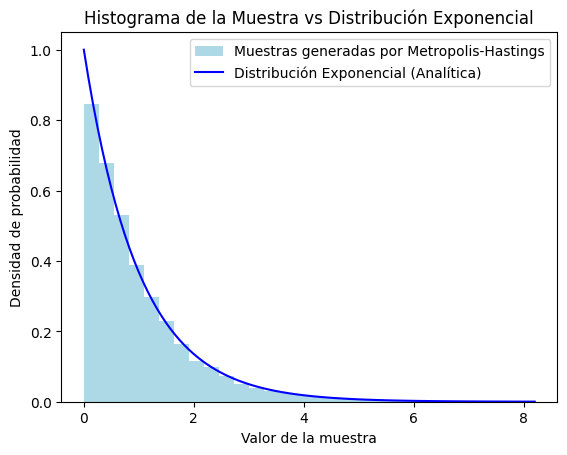

In [236]:
# Realiza el histograma de la muestra generada
plt.hist(x,density=True,color="lightblue",label="Muestras generadas por Metropolis-Hastings",bins=30)
# Grafica la distribución analítica
xs=np.linspace(0,max(x),100)
plt.plot(xs,f(xs,L),color="blue",label="Distribución Exponencial (Analítica)")
plt.title("Histograma de la Muestra vs Distribución Exponencial")
plt.xlabel("Valor de la muestra")
plt.ylabel("Densidad de probabilidad")
plt.legend()

**c) Determinación de la media y desviación estándar de la muestra y su comparación con la analítica.**

Calculamos la media y desviación estandar de la muestra

In [237]:
# m -> Media de la muestra
m=np.mean(x)
# d -> Desviación estandar de la muestra
d=np.std(x)
print("La media de la muestra es",m,"y la desviación estandar es",d)

La media de la muestra es 1.0126312368831312 y la desviación estandar es 1.0412779573925333


Realizamos la comparación

In [238]:
#Comparando las medias
  # Dif_medias -> Diferencia entre la media analítica(mu) y la media de la muestra(m)
Df_medias = abs(mu-m)
print("Comparando la media analítica con la muestral encontramos una diferencia de",Df_medias)

Comparando la media analítica con la muestral encontramos una diferencia de 0.01263123688313117


In [239]:
#Comparando las desviaciones
  # Dif_desviaciones -> Diferencia entre la desviación estandar analítica(sigma) y la desviación estandar de la muestra(d)
Df_desviaciones = abs(sigma-d)
print("Comparando la desviación estandar analítica con la muestral encontramos una diferencia de",Df_desviaciones)

Comparando la desviación estandar analítica con la muestral encontramos una diferencia de 0.04127795739253326


**d) Conclusiones**

 Dado una diferencia pequeña tanto en la comparación de las medias y las desviaciones estandar podemos concluir que la muestra representa bien a la distribución exponencial y que la media muestral es una buena estimación de la media analítica.

## Gráfica de caminantes aleatorios

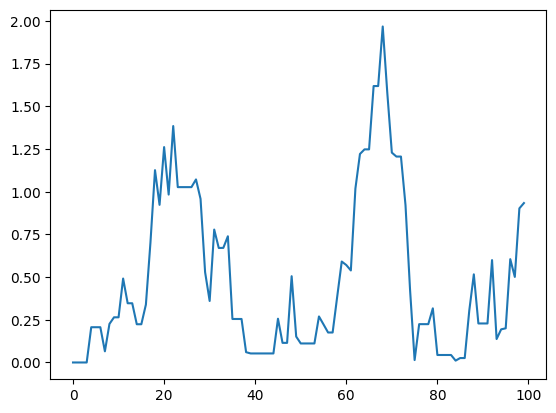

In [240]:
plt.plot(x[0:100])

# **DISTRIBUCIÓN 2**

## **Distribución uniforme**

la distribución uniforme continua es una familia de distribuciones de probabilidad para variables aleatorias continuas, tales que para cada miembro de la familia, todos los intervalos de igual longitud en la distribución en su rango son igualmente probables. El dominio está definido por dos parámetros,
$a$ y $b$, que son sus valores mínimo y máximo respectivamente.

**Función de densidad de probabilidad $ =\frac{1}{b-a}$**

In [241]:
# Función que calcula el valor de la densidad de probabilidad para cada valor de x con lamda dada.
def f(x,a,b):
    return (1/(b-a))

Establecer el valor de $a$ y $b$

In [242]:
# a-> Límite inferior
a = 0
# b -> Límite superior
b= 4

**Calcular los valores de la media y la desviación estandar (valores analíticos).**

In [243]:
# mu -> Media analítica
mu= (a+b)/2
print("La media analítica es",mu)
# sigma -> Desviación estandar analítica
sigma=np.sqrt(((b-a)^2)/12)
print("La desviación estandar analítica es",sigma)

La media analítica es 2.0
La desviación estandar analítica es 0.7071067811865476


**Establecemos el valor de la amplitud de la propuesta de la cadena de Markov (delta).**

In [244]:
#delta -> Amplitud de la cadena de Markov
delta=1

**Algoritmo de Metropolis-Hastings para muestreo de la distribución de probabilidad normal**

In [245]:
# n -> Número de iteraciones del algoritmo de Metropolis-Hastings.
n=50000
# x -> array de ceros con tamaño 𝑛 donde todas las muestras inician en cero pero se almacenarán las muestras generadas en cada paso de la cadena de Markov.
x=np.zeros(n)
# x[0] -> Muestra inicial
x[0]=0
# acept -> Contador de aceptaciones
acept=0
# Ciclo donde en cada iteración se realiza una propuesta y se decide si se acepta o se rechaza.
for i in range(0,n-1):
  # y -> Propuesta
  y=x[i]+np.random.uniform(-delta,delta)
  # Ciclo donde se acepta o se rechaza la propuesta
    # np.random.rand()<min(1,f(y,a,b)/f(x[i],a,b)) -> Condición para aceptar la propuesta
  if np.random.rand()<min(1,f(y,a,b)/f(x[i],a,b)):
    # x[i+1]=y -> Al aceptarse la propuesta la nueva muestra 𝑥[𝑖+1] se establece como y
    x[i+1]=y
    # acept+=1 -> Al aceptarse la propuesta se incrementa el contador de aceptaciones en un 1
    acept+=1
  else:
    #x[i+1]=x[i] -> Si la propuesta no se acepta, la nueva muestra x[i+1] se establece como la muestra anterior 𝑥[𝑖]
    x[i+1]=x[i]
# Se imprime el porcentaje de aceptaciones
print("La aceptacion fue del",acept/n*100,"%")

La aceptacion fue del 99.998 %


**a) Gráfica de la distribución analítica**

**b) Histograma de la muestra generada**

ValueError: x and y must have same first dimension, but have shapes (100,) and (1,)

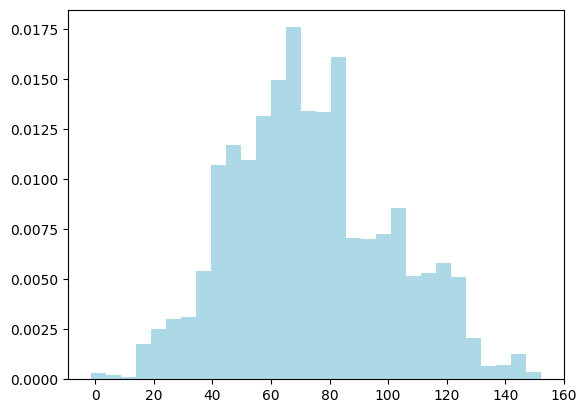

In [246]:
# Realiza el histograma de la muestra generada
plt.hist(x,density=True,color="lightblue",label="Muestras generadas por Metropolis-Hastings",bins=30)
# Grafica la distribución analítica
xs=np.linspace(a,b,100)
plt.plot(xs,f(xs,a,b),color="blue",label="Distribución Exponencial (Analítica)")
plt.title("Histograma de la Muestra vs Distribución Exponencial")
plt.xlabel("Valor de la muestra")
plt.ylabel("Densidad de probabilidad")
plt.legend()

**c) Determinación de la media y desviación estándar de la muestra y su comparación con la analítica.**

Calculamos la media y desviación estandar de la muestra

In [ ]:
# m -> Media de la muestra
m=np.mean(x)
# d -> Desviación estandar de la muestra
d=np.std(x)
print("La media de la muestra es",m,"y la desviación estandar es",d)

Realizamos la comparación

In [ ]:
#Comparando las medias
  # Dif_medias -> Diferencia entre la media analítica(mu) y la media de la muestra(m)
Df_medias = abs(mu-m)
print("Comparando la media analítica con la muestral encontramos una diferencia de",Df_medias)

In [ ]:
#Comparando las desviaciones
  # Dif_desviaciones -> Diferencia entre la desviación estandar analítica(sigma) y la desviación estandar de la muestra(d)
Df_desviaciones = abs(sigma-d)
print("Comparando la desviación estandar analítica con la muestral encontramos una diferencia de",Df_desviaciones)

**d) Conclusiones**

 Dado una diferencia tan pequeña tanto en la comparación de las medias y las desviaciones estandar podemos concluir que la muestra representa bien a la distribución normal y que la media muestral es una buena estimación de la media analítica.

# Gráfica de caminantes aleatorios

In [ ]:
plt.plot(x[0:100])